In [4]:
import torch 
from torchviz import make_dot

tensor(20., grad_fn=<SumBackward0>)
None


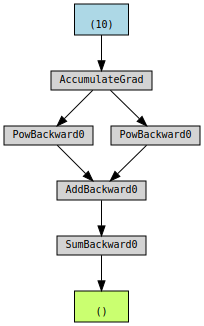

In [9]:
#Below is a situation when we are not using detach()
x=torch.ones(10, requires_grad=True)

y=x**2
z=x**3
r=(y+z).sum()
print(r)
print(x.grad)
make_dot(r)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


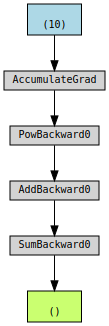

In [10]:
#Situation when we are using detach()
x=torch.ones(10, requires_grad=True)

y=x**2
z=x.detach()**3

r=(y+z).sum()
r.backward()
print(x.grad)
make_dot(r)

tensor(20., grad_fn=<SumBackward0>)
None
tensor(20., grad_fn=<SumBackward0>)
None


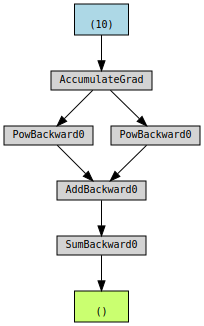

In [22]:
#Below is a situation when we are not using detach()
x=torch.ones(10, requires_grad=True)

y=x**2
#z=x.detach()**3
z=x**3

r=(y+z).sum()
print(r)
print(x.grad)
#make_dot(r)
y=x**2
z=x.requires_grad_()**3
print(r)
print(x.grad)
make_dot(r)

In [55]:
x=torch.ones(10, requires_grad=True)
r_batch = []
for i in range(1,5):
    y=x**2
    if (i % 2):
        print('detached')
        z=x.detach()**3
    else:
        print('not detached')
        z=x**3
    r=(y+z).sum()
    r.backward()
    print(x.grad)
    r_batch.append(r)
    
    

detached
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
not detached
tensor([7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])
detached
tensor([9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])
not detached
tensor([14., 14., 14., 14., 14., 14., 14., 14., 14., 14.])


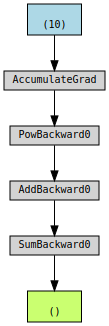

In [56]:
make_dot(r_batch[0])

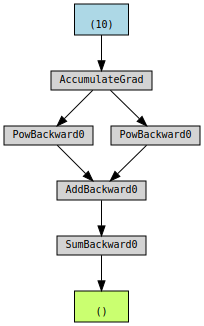

In [57]:
make_dot(r_batch[1])

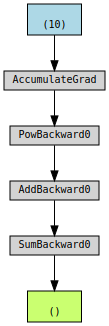

In [59]:
make_dot(r_batch[2])

In [34]:
if(98 % 2):
    print('impar')
else:
    print('par')

par


None
tensor([[-0.5095,  0.6181, -0.4501],
        [-0.5594, -0.4734, -0.2059],
        [-0.7269, -0.4113,  0.1307]])


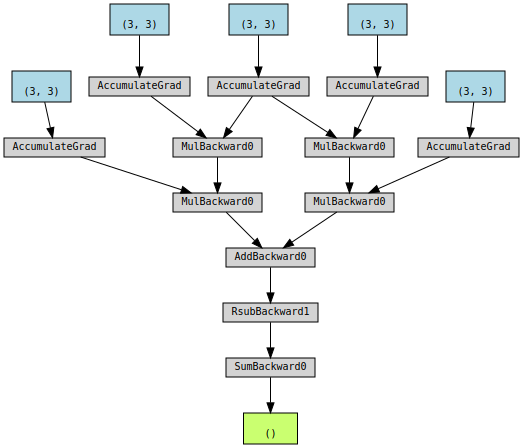

In [7]:
import torch 

a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

b = w1*a 
c = w2*a

d = w3*b + w4*c 

# Replace L = (10 - d) by 
L = (10 -d).sum()
print(a.grad)
L.backward()
print(a.grad)
make_dot(L)

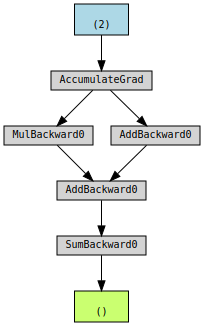

In [8]:
import torchviz
from torchviz import make_dot
x=torch.ones(2, requires_grad=True)
y=2*x
z=3+x
r=(y+z).sum()    
make_dot(r)

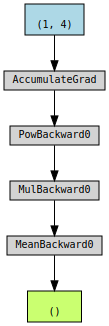

In [97]:
import torch

a = torch.randn((1, 4), requires_grad=True)
b = a**2
c = b*2
d = c.mean()
e = c.sum()

make_dot(d)

In [98]:
# when we do d.backward(), that is fine. After this computation, the parts of the graph that calculate d will be freed by default to save memory. So if we do e.backward(), the error message will pop up. In order to do e.backward(), we have to set the parameter retain_graph to True in d.backward(), i.e.,

# As long as you use retain_graph=True in your backward method, you can do backward any time you want:

d.backward(retain_graph=True)
e.backward(retain_graph=True)
d.backward(retain_graph=True)
e.backward()

In [ ]:
import torch

m1 = torch.nn.Conv2d(3, 5, 3)
m2 = torch.nn.Conv2d(5, 5, 1)
x = torch.randn(2, 3, 4, 4)

### making a forward pass:
h1 = m1(x)
h2 = h1.detach()
z1 = m2(h1)
z2 = m2(h2)

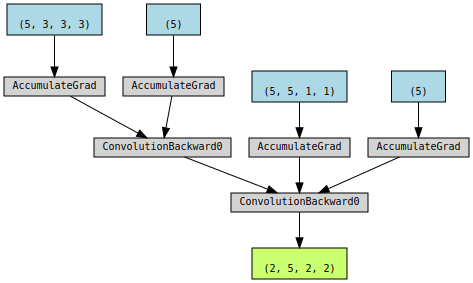

In [81]:
make_dot(z1)

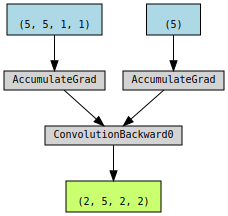

In [82]:
make_dot(z2)

In [ ]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

# Let’s say we want to finetune the model on a new dataset with 10 labels. In resnet, the classifier is the last linear layer model.fc. We can simply replace it with a new linear layer (unfrozen by default) that acts as our classifier.

model.fc = nn.Linear(512, 10)

# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)


tensor([1., 1.], requires_grad=True)
tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3.])


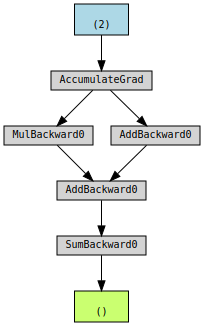

In [112]:
import torch
from torchviz import make_dot

x=torch.ones(2, requires_grad=True)
print(x)
y=2*x
z=3+x
r=(y+z).sum()
r.backward()
print(r)
print(x.grad)    
make_dot(r)

tensor([2., 2.])


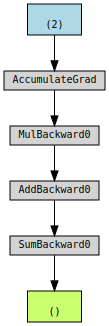

In [108]:
x=torch.ones(2, requires_grad=True)
y=2*x
z=3+x.detach()
r=(y+z).sum()
r.backward() 
print(x.grad)   
make_dot(r)

False
tensor([2., 2.])


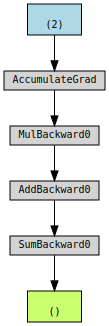

In [113]:
x=torch.ones(2, requires_grad=True)

# equivalent to detach, but could be applied to a group
with torch.no_grad():
    z=3+x
print(z.requires_grad)
y=2*x
r=(y+z).sum() 
r.backward()
print(x.grad)   
make_dot(r)

tensor([1.], requires_grad=True)
tensor([4.], grad_fn=<MulBackward0>)
tensor([8.])
tensor([8.], grad_fn=<PowBackward0>)
tensor([56.])


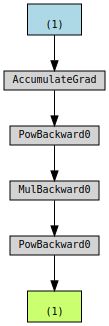

In [124]:
x = torch.tensor(([1.0]),requires_grad=True)
y = x**2
z = 2*y
w = z**3
print(x)

# This is the subpath
# Do not use detach()
p = z
q = torch.tensor(([2.0]), requires_grad=True)
pq = p*q
print(pq)
pq.backward(retain_graph=True) # grad_1
print(x.grad)

w.backward() # grad_2
print(w)
print(x.grad) # grad_1 + grad_2
make_dot(w)

None
tensor([48.])


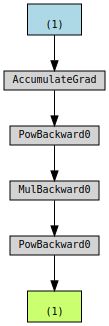

In [128]:
x = torch.tensor(([1.0]),requires_grad=True)
y = x**2
z = 2*y
w= z**3

# detach it, so the gradient w.r.t `p` does not effect `z`!
p = z.detach()
q = torch.tensor(([2.0]), requires_grad=True)
pq = p*q
pq.backward(retain_graph=True)
print(x.grad)

w.backward()
print(x.grad)
make_dot(w)

False
None
tensor([48.])


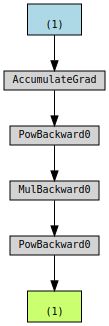

In [140]:
import torch

x = torch.tensor(([1.0]),requires_grad=True)
y = x**2
z = 2*y
w= z**3

# detach it, so the gradient w.r.t `p` does not effect `z`!
with torch.no_grad():
    z = 2*y
p = z   
print(p.requires_grad)
q = torch.tensor(([2.0]), requires_grad=True)
pq = p*q
pq.backward(retain_graph=True)
print(x.grad)

w.backward()
print(x.grad)
make_dot(w)

In [ ]:
# freeze

critic_loss = ((reward+(gamma*critic_new.detach())) - critic_old)**2

In [ ]:
# suppose you first back-propagate loss1, then loss2 (you can also do the reverse)
loss1.backward(retain_graph=True)
loss2.backward() # now the graph is freed, and next process of batch gradient descent is ready

optimizer.step() # update the network parameters